# Week4授業前課題 アヤメを分類しよう   
この課題の目的

- 教師あり学習(分類問題)の概観を知る
- scikit-laernを使い分類を行えるようにする
- 手法の簡単な比較をする

## 【課題1】 練習のために特徴量とカテゴリを選択

In [75]:
from sklearn import datasets
import numpy as np
import pandas as pd

#irisデータセットの読み込み
iris = datasets.load_iris()

#説明変数をX_dfに、目的変数をy_dfに格納し、列目を付ける
X_df = pd.DataFrame(iris.data)
y_df = pd.DataFrame(iris.target)
X_df.columns = iris.feature_names
y_df.columns = ['Species']

#結合
df = pd.concat([X_df, y_df], axis=1)

#抜き出し
df = df[(df['Species'] == 1) | (df['Species'] == 2)][['sepal length (cm)',  'petal length (cm)', 'Species']]
df

,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
55,5.7,4.5,1
56,6.3,4.7,1
57,4.9,3.3,1
58,6.6,4.6,1
59,5.2,3.9,1


## 【問題2】 データの分析

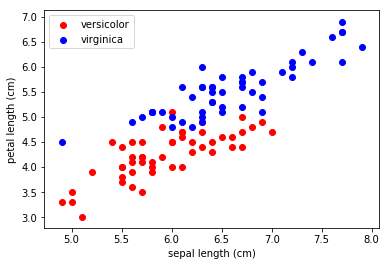

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

#散布図の描写
versicolor_sepal_length = df[df['Species'] == 1]['sepal length (cm)']
versicolor_petal_length = df[df['Species'] == 1]['petal length (cm)']
virginica_sepal_length = df[df['Species'] == 2]['sepal length (cm)']
virginica_petal_length = df[df['Species'] == 2]['petal length (cm)']

#横軸にsepal_length, 縦軸にpetal_length
plt.scatter(versicolor_sepal_length, versicolor_petal_length, color='red', label=iris.target_names[1])
plt.scatter(virginica_sepal_length, virginica_petal_length, color='blue', label=iris.target_names[2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

#凡例
plt.legend()

#出力
plt.show()

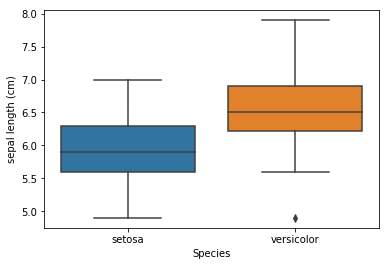

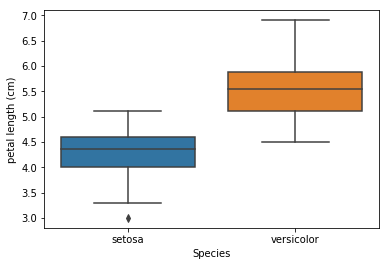

In [3]:
import seaborn as sns

#boxplot
#縦軸に各特徴量、横軸に各ラベル
for i in range(2):
    boxplot = sns.boxplot(x=df['Species'], y=df.iloc[:, i])
    boxplot.set_xticklabels(iris.target_names)
    plt.show()

/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


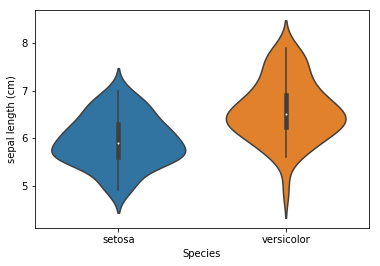

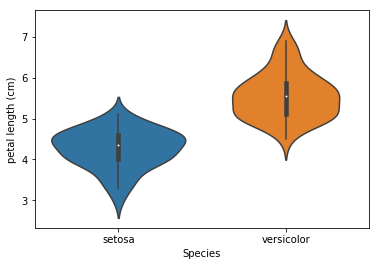

In [4]:
#violinplot
#縦軸に各特徴量、横軸に各ラベル
for i in range(2):
    violinplot = sns.violinplot(x=df['Species'], y=df.iloc[:, i])
    violinplot.set_xticklabels(iris.target_names)
    plt.show()

## 【問題2】 前処理・学習用データと検証用データの分割

In [5]:
from sklearn.model_selection import train_test_split

#説明変数をX、目的変数をyというndarrayに格納
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## 【問題3】 前処理・標準化

In [6]:
from sklearn.preprocessing import StandardScaler

#学習用データをfit(平均と標準偏差を計算)し、transform(標準化)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

#検証用データをtransform(標準化)
X_test_std = sc.transform(X_test)

## 【問題4】 学習と推定

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#5-nn
#学習
neigh_5nn = KNeighborsClassifier()
neigh_5nn.fit(X_train_std, y_train)

#推定
y_pred_5nn = neigh_5nn.predict(X_test_std)
y_pred_5nn

array([2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2])

In [8]:
#3-nn
#学習
neigh_3nn = KNeighborsClassifier(n_neighbors=3)
neigh_3nn.fit(X_train_std, y_train)

#推定
y_pred_3nn = neigh_3nn.predict(X_test_std)
y_pred_3nn

array([2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2])

In [9]:
#1-nn
#学習
neigh_1nn = KNeighborsClassifier(n_neighbors=1)
neigh_1nn.fit(X_train_std, y_train)

#推定
y_pred_1nn = neigh_1nn.predict(X_test_std)
y_pred_1nn

array([2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 1])

## 【問題5】 評価

### ・accuracy

正解率を表す。陽性に分類するべきものを陽性に分類し、陰性に分類するものを陰性に分類できた割合を示す。   
TP：真陽性   
FP：偽陽性   
FN：偽陰性   
TN：真陰性  
$ accuracy = \frac{TP + TN}{TP + TN + FP + FN}  $

In [10]:
from sklearn.metrics import accuracy_score

#5-nn
accuracy_score_5nn = accuracy_score(y_test, y_pred_5nn)
accuracy_score_5nn

0.96

In [11]:
#3-nn
accuracy_score_3nn = accuracy_score(y_test, y_pred_3nn)
accuracy_score_3nn

0.92

In [12]:
#1-nn
accuracy_score_1nn = accuracy_score(y_test, y_pred_1nn)
accuracy_score_1nn

0.88

### ・precision

適合率を表す。陽性と分類したサンプルの内、実際に陽性であったものの割合を示す。   
$ precision = \frac{TP}{TP + FP} $

In [13]:
from sklearn.metrics import precision_score

#5-nn
precision_score_5nn = precision_score(y_test, y_pred_5nn)
precision_score_5nn

1.0

In [14]:
#3-nn
precision_score_3nn = precision_score(y_test, y_pred_3nn)
precision_score_3nn

1.0

In [15]:
#1-nn
precision_score_1nn = precision_score(y_test, y_pred_1nn)
precision_score_1nn

0.9230769230769231

### ・recall

再現率を表す。本来陽性に分類すべきものを、正しく陽性に分類できた割合。真陽性率(TPR)もしくは感度(Sensitivity)とも呼ばれる。   
$ recall = \frac{TP}{TP + FN} $

In [16]:
from sklearn.metrics import recall_score

#5-nn
recall_score_5nn = recall_score(y_test, y_pred_5nn)
recall_score_5nn

0.9285714285714286

In [17]:
#3-nn
recall_score_3nn = recall_score(y_test, y_pred_3nn)
recall_score_3nn

0.8571428571428571

In [18]:
#1-nn
recall_score_1nn = recall_score(y_test, y_pred_1nn)
recall_score_1nn

0.8571428571428571

### ・f値

precision(適合率)とrecall(再現率)の調和平均として定義されている。つまり、適合率が高くても、再現率が低いモデルでないか、逆に、再現率が高くても、適合率が低いモデルでないかといった評価を示す。   
$ f1 = 2\times \frac{precision \times recall}{precision + recall} $ 

In [19]:
from sklearn.metrics import f1_score

#5-nn
f1_score_5nn = f1_score(y_test, y_pred_5nn)
f1_score_5nn

0.962962962962963

In [20]:
#3-nn
f1_score_3nn = f1_score(y_test, y_pred_3nn)
f1_score_3nn

0.923076923076923

In [21]:
#1-nn

f1_score_1nn = f1_score(y_test, y_pred_1nn)
f1_score_1nn

0.888888888888889

### ・混合行列

混合行列は、分類器の真陽性(true positive)、真陰性(true negative)、偽陽性(false positive)、偽陰性(false negative)の4つの予測の個数を報告する正方行列である。   
<img src='precision5.png' width='500'>

In [68]:
from sklearn.metrics import confusion_matrix

#5-nn
confusion_matrix(y_test, y_pred_5nn)

array([[13,  1],
       [ 0, 11]])

In [23]:
#3-nn
confusion_matrix(y_test, y_pred_3nn)

array([[12,  2],
       [ 0, 11]])

In [24]:
#1-nn
confusion_matrix(y_test, y_pred_1nn)

array([[12,  2],
       [ 1, 10]])

## 【問題6】 可視化

In [77]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='sepal length (cm)', ylabel='petal length (cm)', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples, 2)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

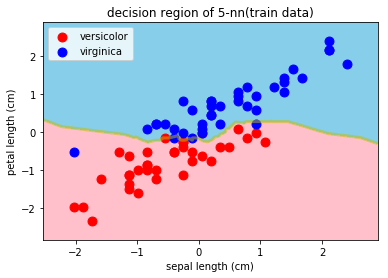

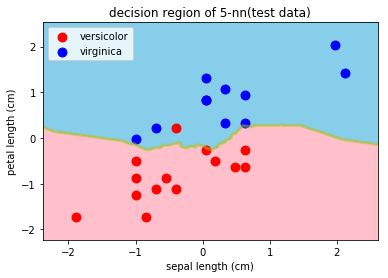

In [26]:
#5-nn
#学習用データ
decision_region(X_train_std, y_train, neigh_5nn, title='decision region of 5-nn(train data)')

#検証用データ
decision_region(X_test_std, y_test, neigh_5nn, title='decision region of 5-nn(test data)')

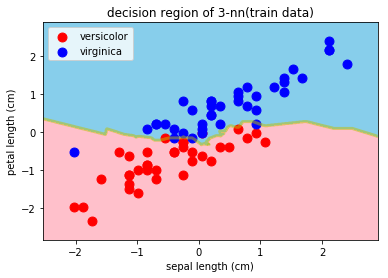

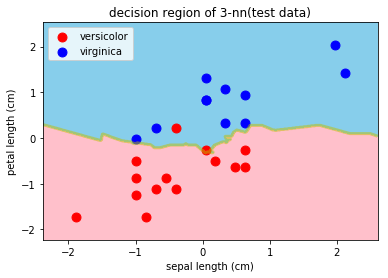

In [27]:
#3-nn
#学習用データ
decision_region(X_train_std, y_train, neigh_3nn, title='decision region of 3-nn(train data)')

#検証用データ
decision_region(X_test_std, y_test, neigh_3nn, title='decision region of 3-nn(test data)')

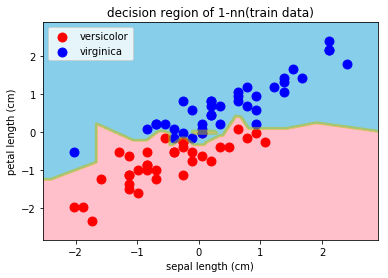

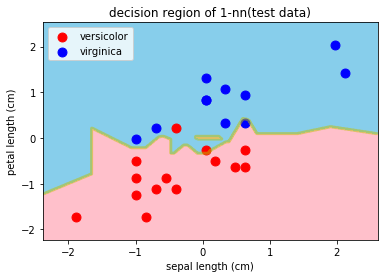

In [28]:
#1-nn
#学習用データ
decision_region(X_train_std, y_train, neigh_1nn, title='decision region of 1-nn(train data)')

#検証用データ
decision_region(X_test_std, y_test, neigh_1nn, title='decision region of 1-nn(test data)')

## 【問題7】 他の手法の学習

### ・ロジスティック回帰

In [29]:
from sklearn.linear_model import LogisticRegression

#学習
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
#推定
y_pred_lr = lr.predict(X_test_std)
y_pred_lr

array([2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2])

In [31]:
#評価
#accuracy
accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
print('accuracy :', accuracy_score_lr)

#precision
precision_score_lr = precision_score(y_test, y_pred_lr)
print('precision :', precision_score_lr)

#recall
recall_score_lr = recall_score(y_test, y_pred_lr)
print('recall :', recall_score_lr)

#f1
f1_score_lr = f1_score(y_test, y_pred_lr)
print('f1 :', f1_score_lr)

accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f1 : 0.962962962962963


In [69]:
#混合行列
confusion_matrix(y_test, y_pred_lr)

array([[13,  1],
       [ 0, 11]])

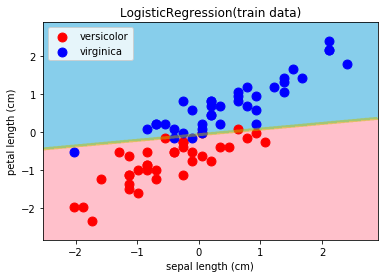

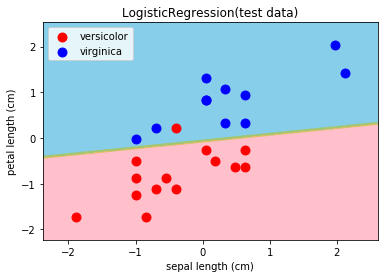

In [32]:
#可視化
#学習用データ
decision_region(X_train_std, y_train, lr, title='LogisticRegression(train data)')

#検証用データ
decision_region(X_test_std, y_test, lr, title='LogisticRegression(test data)')

### ・SVM

In [33]:
from sklearn.svm import SVC

#学習
svm = SVC()
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
#推定
y_pred_svm = svm.predict(X_test_std)
y_pred_svm

array([2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2])

In [35]:
#評価
#accuracy
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)
print('accuracy :', accuracy_score_svm)

#precision
precision_score_svm = precision_score(y_test, y_pred_svm)
print('precision :', precision_score_svm)

#recall
recall_score_svm = recall_score(y_test, y_pred_svm)
print('recall :', recall_score_svm)

#f1
f1_score_svm = f1_score(y_test, y_pred_svm)
print('f1 :', f1_score_svm)

accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f1 : 0.962962962962963


In [71]:
#混合行列
confusion_matrix(y_test, y_pred_svm)

array([[13,  1],
       [ 0, 11]])

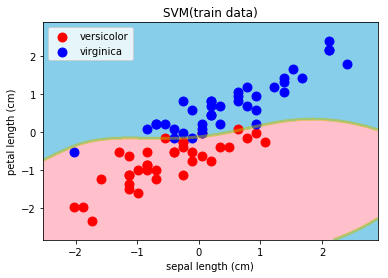

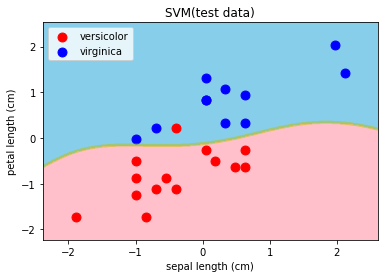

In [36]:
#可視化
#学習用データ
decision_region(X_train_std, y_train, svm, title='SVM(train data)')

#検証用データ
decision_region(X_test_std, y_test, svm, title='SVM(test data)')

### ・決定木

In [37]:
from sklearn.tree import DecisionTreeClassifier

#学習
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
#推定
y_pred_tree = tree.predict(X_test_std)
y_pred_tree

array([2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 2])

In [39]:
#評価
#accuracy
accuracy_score_tree = accuracy_score(y_test, y_pred_tree)
print('accuracy :', accuracy_score_tree)

#precision
precision_score_tree = precision_score(y_test, y_pred_tree)
print('precision :', precision_score_tree)

#recall
recall_score_tree = recall_score(y_test, y_pred_tree)
print('recall :', recall_score_tree)

#f1
f1_score_tree = f1_score(y_test, y_pred_tree)
print('f1 :', f1_score_tree)

accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f1 : 0.9285714285714286


In [72]:
#混合行列
confusion_matrix(y_test, y_pred_tree)

array([[13,  1],
       [ 1, 10]])

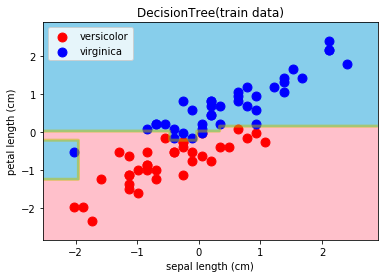

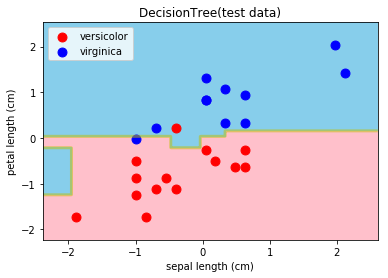

In [40]:
#可視化
#学習用データ
decision_region(X_train_std, y_train, tree, title='DecisionTree(train data)')

#検証用データ
decision_region(X_test_std, y_test, tree, title='DecisionTree(test data)')

### ・ランダムフォレスト

In [41]:
from sklearn.ensemble import RandomForestClassifier

#学習
forest = RandomForestClassifier()
forest.fit(X_train_std, y_train)

/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
#推定
y_pred_forest = forest.predict(X_test_std)
y_pred_forest

array([2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 2])

In [43]:
#評価
#accuracy
accuracy_score_forest = accuracy_score(y_test, y_pred_forest)
print('accuracy :', accuracy_score_forest)

#precision
precision_score_forest = precision_score(y_test, y_pred_forest)
print('precision :', precision_score_forest)

#recall
recall_score_forest = recall_score(y_test, y_pred_forest)
print('recall :', recall_score_forest)

#f1
f1_score_forest = f1_score(y_test, y_pred_forest)
print('f1 :', f1_score_forest)

accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f1 : 0.9285714285714286


In [73]:
#混合行列
confusion_matrix(y_test, y_pred_forest)

array([[13,  1],
       [ 1, 10]])

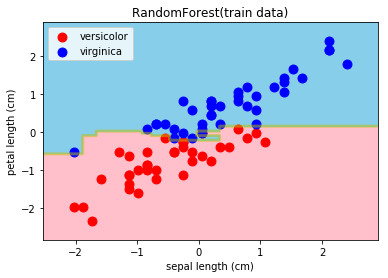

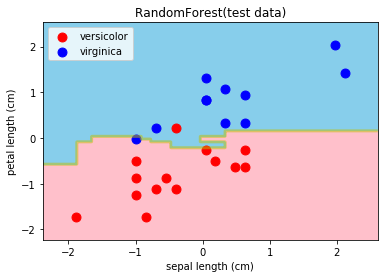

In [44]:
#可視化
#学習用データ
decision_region(X_train_std, y_train, forest, title='RandomForest(train data)')

#検証用データ
decision_region(X_test_std, y_test, forest, title='RandomForest(test data)')

In [45]:
#指標値を表にまとめる(デフォルト値)
score = pd.DataFrame([[accuracy_score_5nn, precision_score_5nn, recall_score_5nn, f1_score_5nn], 
                         [accuracy_score_lr, precision_score_lr, recall_score_lr, f1_score_lr],
                         [accuracy_score_svm, precision_score_svm, recall_score_svm, f1_score_svm],
                         [accuracy_score_tree, precision_score_tree, recall_score_tree, f1_score_tree],
                          [accuracy_score_forest, precision_score_forest, recall_score_forest, f1_score_forest]],
                        index = ['最近傍法', 'ロジスティック回帰', 'SVM', '決定木', 'ランダムフォレスト'], 
                        columns = ['accuracy', 'precision', 'recall', 'f値'])
score

,accuracy,precision,recall,f値
最近傍法,0.96,1.000000,0.928571,0.962963
ロジスティック回帰,0.96,1.000000,0.928571,0.962963
SVM,0.96,1.000000,0.928571,0.962963
決定木,0.92,0.928571,0.928571,0.928571
ランダムフォレスト,0.92,0.928571,0.928571,0.928571


指標値ごとの結果は、最近傍法、ロジスティック回帰、SVMが同じ結果となり、それ以外の手法では、recall以外が少し低い結果となった。   
決定領域を確認すると、決定木とランダムフォレストにおいてversicolor(1)をvirginica(2)と誤分類したものが1つ、virginica(2)をversicolor(1)と分類したものが1つずつあった。最近傍法、ロジスティック回帰、SVMではversicolor(1)をvirginica(2)と誤分類したのみであったため、この差ができたと思われる。

## 【問題8】 各パラメータの意味

### ・最近傍法   
k近傍法は、選択された距離指標に基づき、学習用データセットのサンプルの中から分類したいデータ点に最も近いk個のサンプルを見つけ出す。検証用データのクラスラベルは、k個の最近傍での多数決によって決まる。このkの値は、KNeighborsClassifierのn_neighborsで変化できる。

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

n_neighborsが 2
accuracy : 0.88
precision : 0.9230769230769231
recall : 0.8571428571428571
f値 : 0.888888888888889


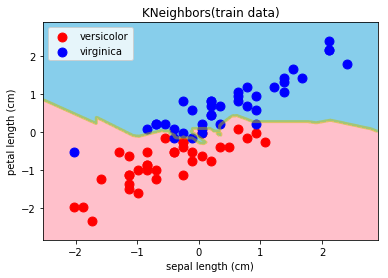

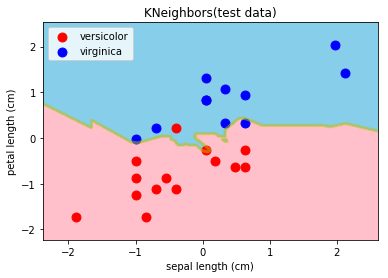

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

n_neighborsが 4
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


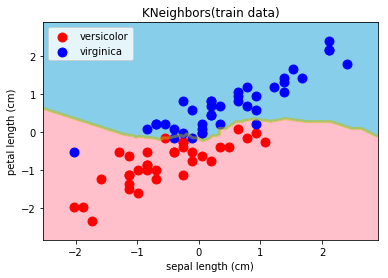

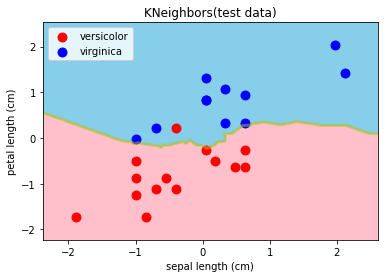

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

n_neighborsが 6
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


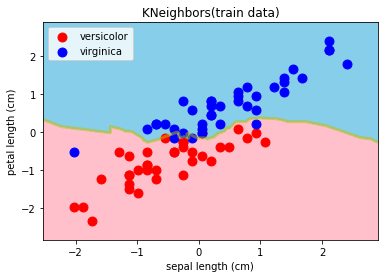

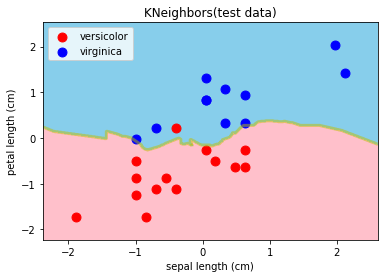

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

n_neighborsが 8
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


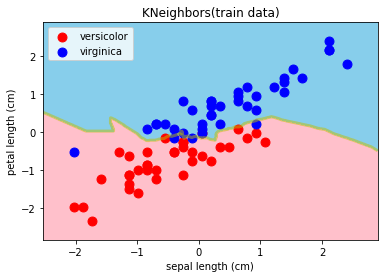

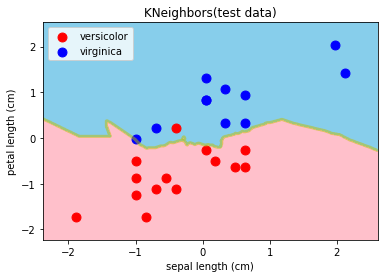

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

n_neighborsが 10
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


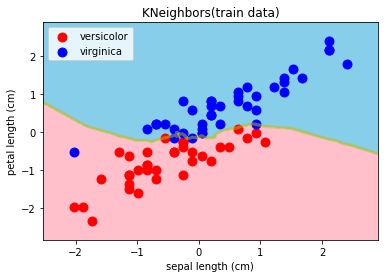

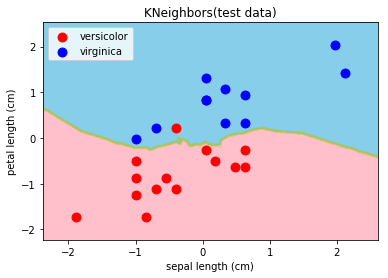

In [46]:
#n_neighborsを変化させて、指標値を確認
for i in range(2, 11, 2):
    
    #学習
    neigh_tuning = KNeighborsClassifier(n_neighbors=i)
    neigh_tuning.fit(X_train_std, y_train)

    #推定
    y_pred_neigh_tuning = neigh_tuning.predict(X_test_std)
    
    print('- ' * 90, '\n')
    print('n_neighborsが', i)
    
    #accuracy
    accuracy_score_neigh_tuning = accuracy_score(y_test, y_pred_neigh_tuning)
    print('accuracy :', accuracy_score_neigh_tuning)
    
    #precision
    precision_score_neigh_tuning = precision_score(y_test, y_pred_neigh_tuning)
    print('precision :', precision_score_neigh_tuning)
    
    #recall
    recall_score_neigh_tuning = recall_score(y_test, y_pred_neigh_tuning)
    print('recall :', recall_score_neigh_tuning)
    
    #f1
    f1_score_neigh_tuning = f1_score(y_test, y_pred_neigh_tuning)
    print('f値 :', f1_score_neigh_tuning)
    
    #散布図を出力
    decision_region(X_train_std, y_train, neigh_tuning, title='KNeighbors(train data)')
    decision_region(X_test_std, y_test, neigh_tuning, title='KNeighbors(test data)')

最近傍法では、2~10の範囲で、2stepおきにn_neighborsを変化させた。   
n_neighbors=2のときに結果が他と比べて低かった。決定領域を見ると、n_neighbors=2の決定領域が一番複雑であり、誤分類も多かった。

### ・ロジスティック回帰 
LogisticRegressionでは、Cが正則化のパラメータである。これを小さくすると、正則化が強くなる。

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 0.01
accuracy : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f値 : 0.8571428571428571


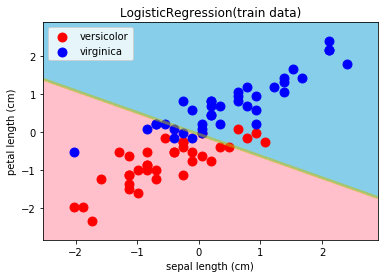

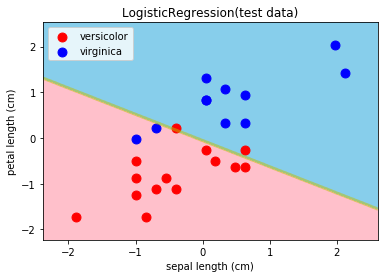

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 0.1
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


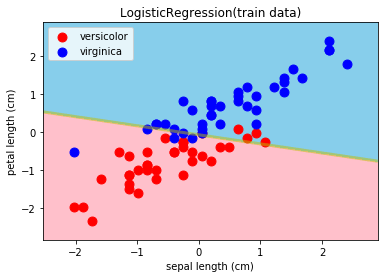

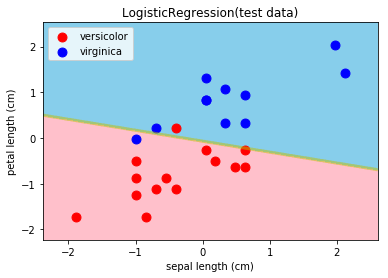

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 1
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


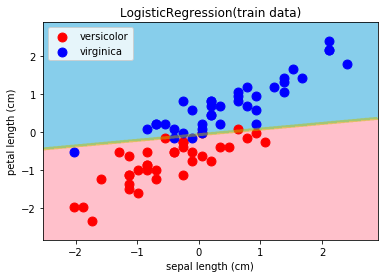

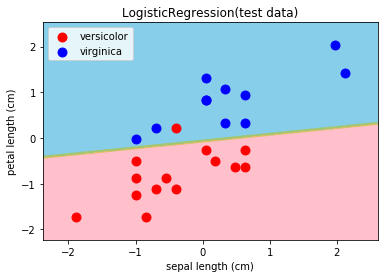

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 10
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


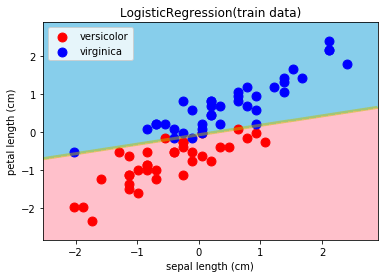

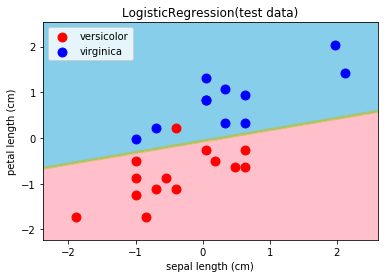

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 100
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


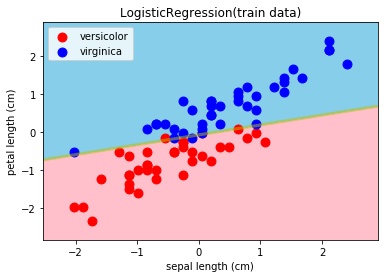

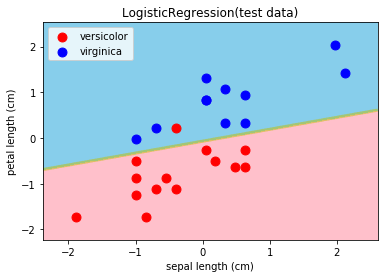

In [47]:
#Cを変化させて、指標値を確認
lr_C = [0.01, 0.1, 1, 10, 100]
for i in lr_C:
    
    #学習
    lr_tuning = LogisticRegression(C=i)
    lr_tuning.fit(X_train_std, y_train)

    #推定
    y_pred_lr_tuning = lr_tuning.predict(X_test_std)
    
    print('- ' * 90, '\n')
    print('Cが', i)
    
    #accuracy
    accuracy_score_lr_tuning = accuracy_score(y_test, y_pred_lr_tuning)
    print('accuracy :', accuracy_score_lr_tuning)
    
    #precision
    precision_score_lr_tuning = precision_score(y_test, y_pred_lr_tuning)
    print('precision :', precision_score_lr_tuning)
    
    #recall
    recall_score_lr_tuning = recall_score(y_test, y_pred_lr_tuning)
    print('recall :', recall_score_lr_tuning)
    
    #f1
    f1_score_lr_tuning = f1_score(y_test, y_pred_lr_tuning)
    print('f値 :', f1_score_lr_tuning)
    
    #散布図を出力
    decision_region(X_train_std, y_train, lr_tuning, title='LogisticRegression(train data)')
    decision_region(X_test_std, y_test, lr_tuning, title='LogisticRegression(test data)')

ロジスティック回帰では、Cを0.01, 0.1, 1, 10, 100と変化させた。   
結果は1, 10, 100が良い結果となった。決定領域は、パラメーターが低いほど境界が右下がりの境界となっており、誤分類が多くなっていた。

### ・SVM 
SVCでは、Cが正則化のパラメータであり、gammaがRBFカーネルパラメータである。Cは小さくするほど正則化が強くなり、gammaは小さいほど決定境界が単純になる。

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 0.1  gammaが 0.1
accuracy : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f値 : 0.8571428571428571


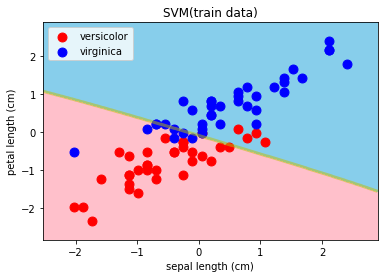

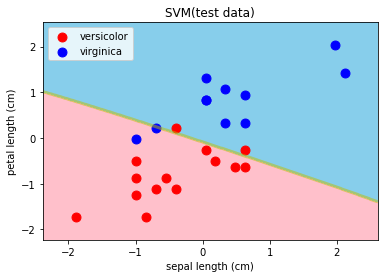

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 0.1  gammaが 1
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


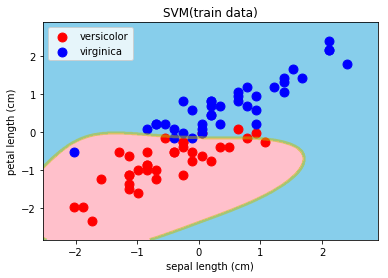

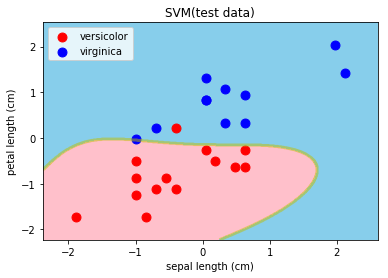

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 0.1  gammaが 10
accuracy : 0.44
precision : 0.0
recall : 0.0
f値 : 0.0


/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


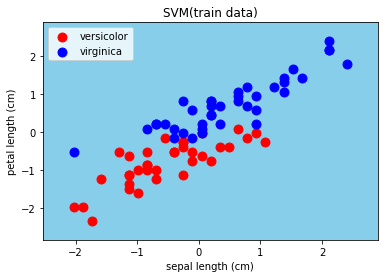

/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


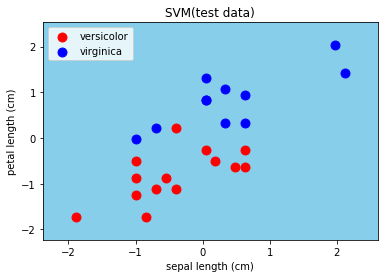

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 1  gammaが 0.1
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


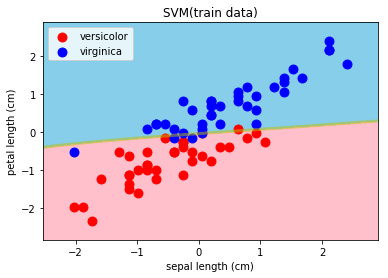

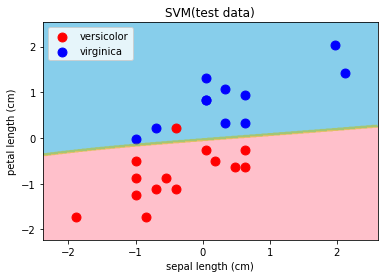

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 1  gammaが 1
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


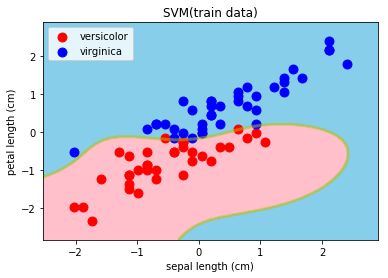

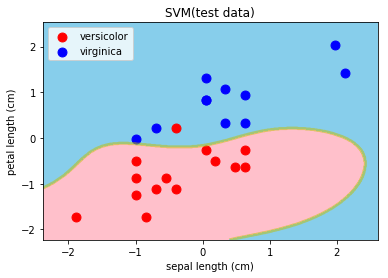

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 1  gammaが 10
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


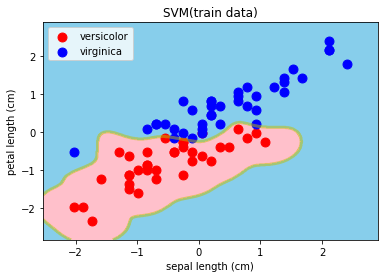

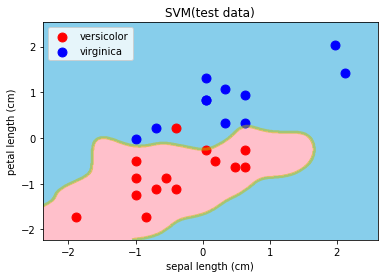

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 10  gammaが 0.1
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


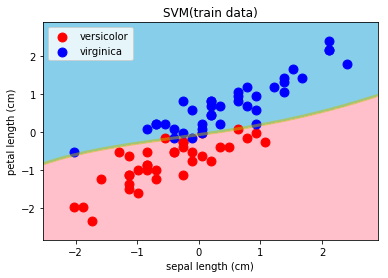

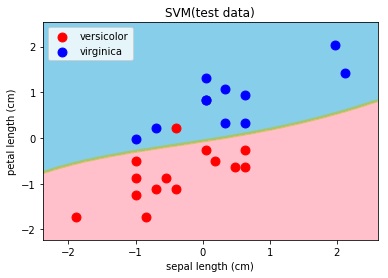

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 10  gammaが 1
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


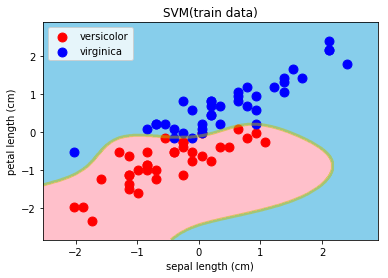

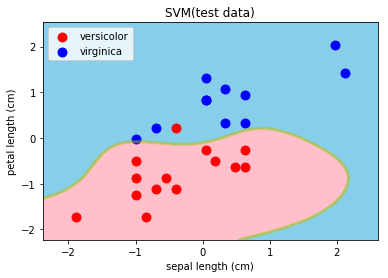

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 10  gammaが 10
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


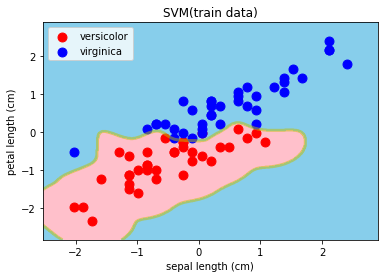

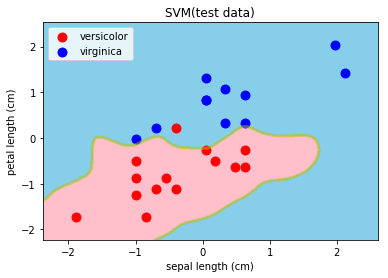

In [48]:
#Cとgammaを変化させて、指標値を確認
svm_C = [0.1, 1, 10]
gamma = [0.1, 1, 10]

for i in svm_C:
    for j in gamma:
    
        #学習
        svm_tuning = SVC(C=i, gamma=j)
        svm_tuning.fit(X_train_std, y_train)

        #推定
        y_pred_svm_tuning = svm_tuning.predict(X_test_std)
        
        print('- ' * 90, '\n')
        print('Cが', i, ' gammaが', j)
        
        #accuracy
        accuracy_score_svm_tuning = accuracy_score(y_test, y_pred_svm_tuning)
        print('accuracy :', accuracy_score_svm_tuning)

        #precision
        precision_score_svm_tuning = precision_score(y_test, y_pred_svm_tuning)
        print('precision :', precision_score_svm_tuning)

        #recall
        recall_score_svm_tuning = recall_score(y_test, y_pred_svm_tuning)
        print('recall :', recall_score_svm_tuning)

        #f1
        f1_score_svm_tuning = f1_score(y_test, y_pred_svm_tuning)
        print('f値 :', f1_score_svm_tuning)

        #散布図を出力
        decision_region(X_train_std, y_train, svm_tuning, title='SVM(train data)')
        decision_region(X_test_std, y_test, svm_tuning, title='SVM(test data)')

SVMでは、Cとgammaをそれぞれ0.1, 1, 10と変化させて、それぞれの組み合わせを確認した。   
C=0.1, gamma=0.1の組み合わせとC=0.1, gamma=10の組み合わせが結果が悪く、C=0.1, gamma=10の組み合わせに至っては全く分類することができていなかった。

### ・決定木
DecisionTreeClassifierでは、max_depthが木の深さを指定するパラメータであり、小さいほど決定境界が単純になる。

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 1
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


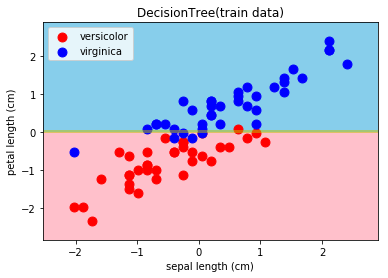

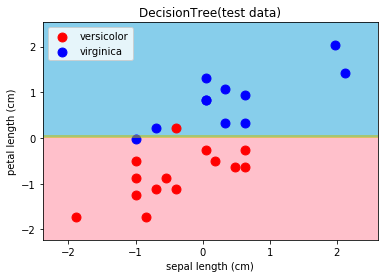

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 2
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


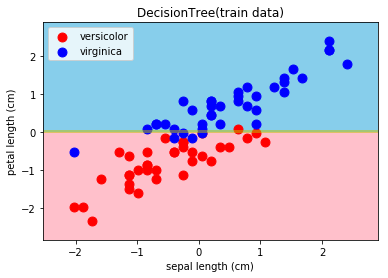

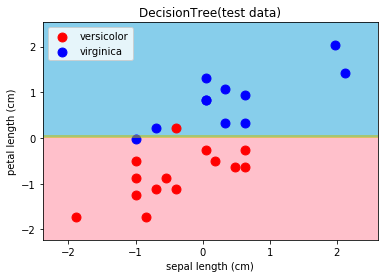

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 3
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


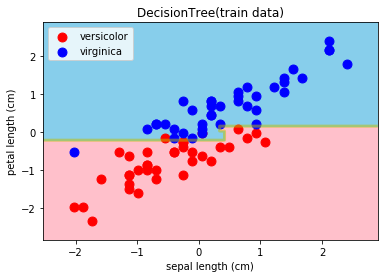

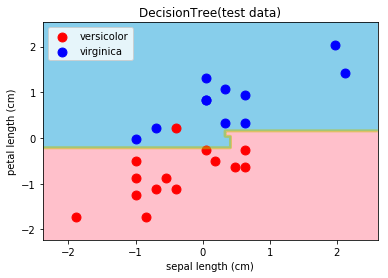

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 4
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


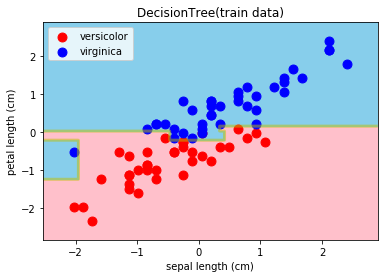

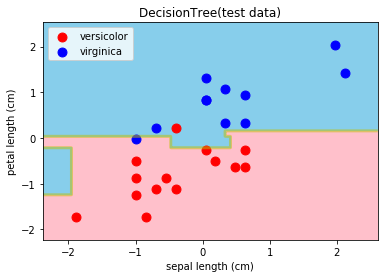

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 5
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


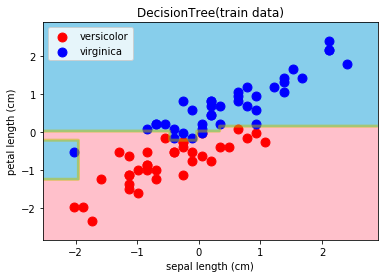

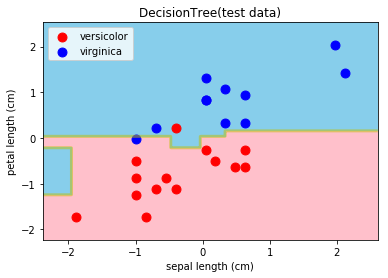

In [49]:
#max_depthを変化させて、指標値を確認
for i in range(1, 6):
    
    #学習
    tree_tuning = DecisionTreeClassifier(max_depth=i)
    tree_tuning.fit(X_train_std, y_train)

    #推定
    y_pred_tree_tuning = tree_tuning.predict(X_test_std)
    
    print('- ' * 90, '\n')
    print('max_depthが', i)
    
    #accuracy
    accuracy_score_tree_tuning = accuracy_score(y_test, y_pred_tree_tuning)
    print('accuracy :', accuracy_score_tree_tuning)
    
    #precision
    precision_score_tree_tuning = precision_score(y_test, y_pred_tree_tuning)
    print('precision :', precision_score_tree_tuning)
    
    #recall
    recall_score_tree_tuning = recall_score(y_test, y_pred_tree_tuning)
    print('recall :', recall_score_tree_tuning)
    
    #f1
    f1_score_tree_tuning = f1_score(y_test, y_pred_tree_tuning)
    print('f値 :', f1_score_tree_tuning)
    
    #散布図を出力
    decision_region(X_train_std, y_train, tree_tuning, title='DecisionTree(train data)')
    decision_region(X_test_std, y_test, tree_tuning, title='DecisionTree(test data)')

決定木では、max_depthの値を1~5の範囲で変化させた。   
max_depth=3時が一番結果が良く、決定領域はmax_depthを大きくするほど複雑になっていた。

### ・ランダムフォレスト
RandomForestClassifierでは、max_depthが各決定木の深さであり、n_estimatorsが多数決に使用する決定木の個数である。max_depthは小さいほど決定境界が単純になる。n_estimatorsは一般的に大きいほど精度は上がるが、計算コストも増える。

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 1 n_estimatorsが 10
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


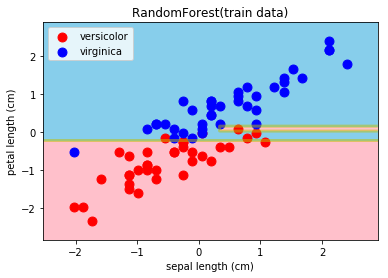

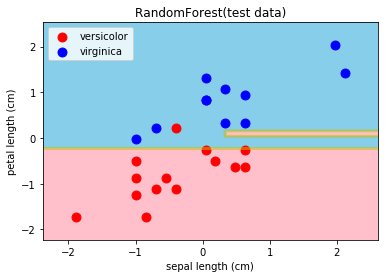

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 1 n_estimatorsが 50
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


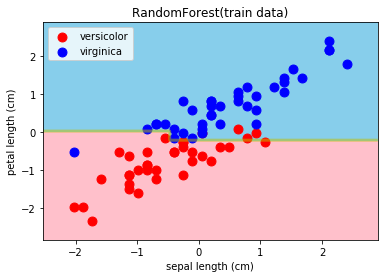

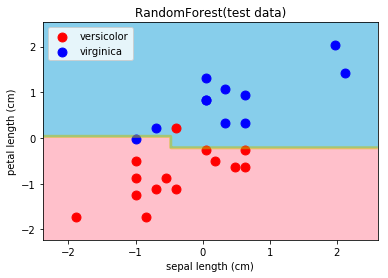

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 1 n_estimatorsが 100
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


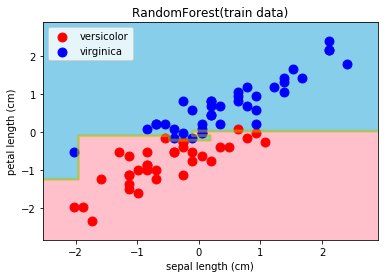

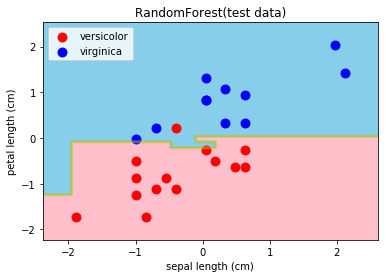

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 2 n_estimatorsが 10
accuracy : 0.88
precision : 0.8666666666666667
recall : 0.9285714285714286
f値 : 0.896551724137931


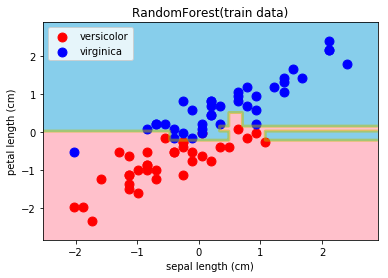

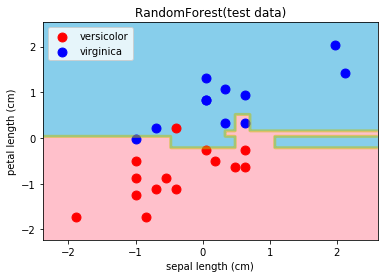

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 2 n_estimatorsが 50
accuracy : 0.84
precision : 0.8125
recall : 0.9285714285714286
f値 : 0.8666666666666666


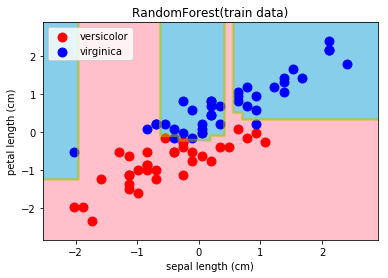

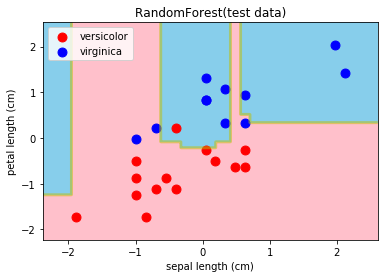

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 2 n_estimatorsが 100
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


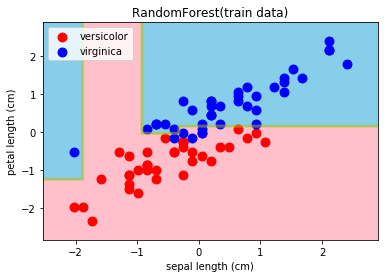

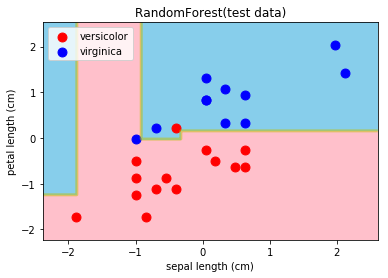

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 3 n_estimatorsが 10
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


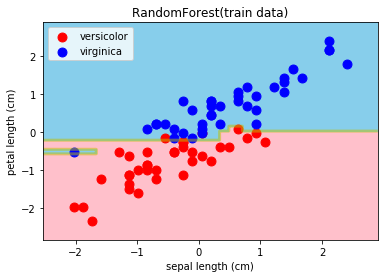

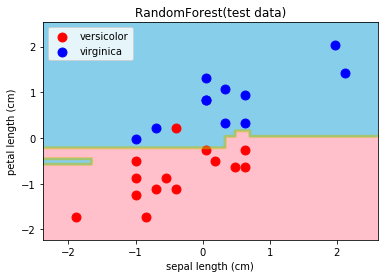

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 3 n_estimatorsが 50
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


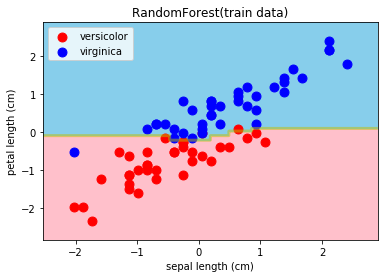

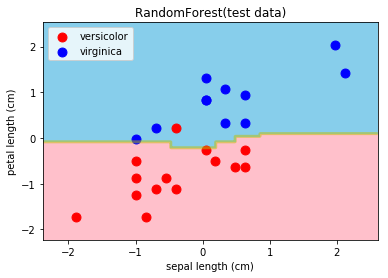

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 3 n_estimatorsが 100
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


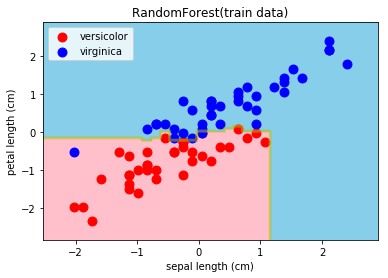

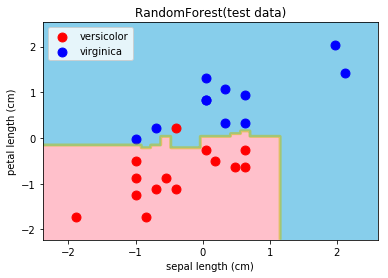

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 4 n_estimatorsが 10
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


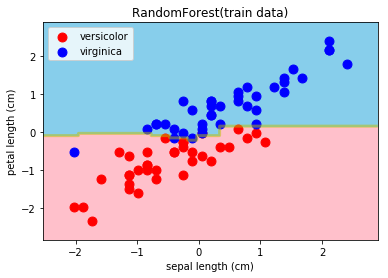

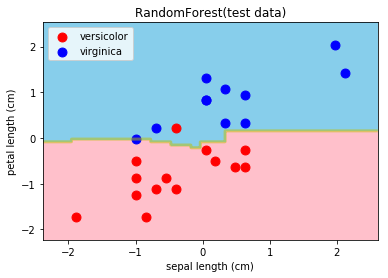

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 4 n_estimatorsが 50
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


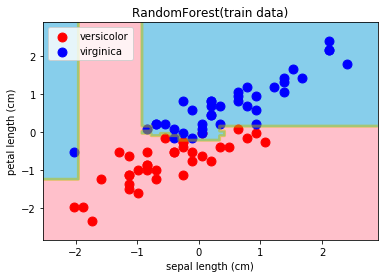

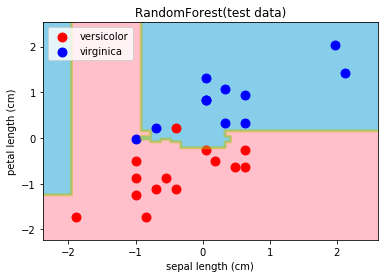

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 4 n_estimatorsが 100
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


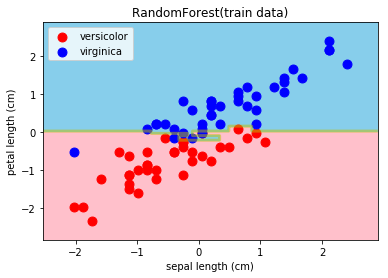

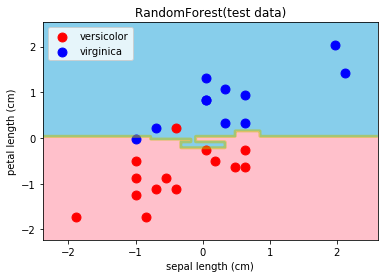

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 5 n_estimatorsが 10
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


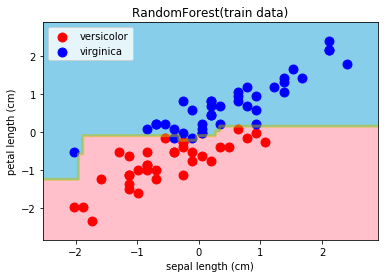

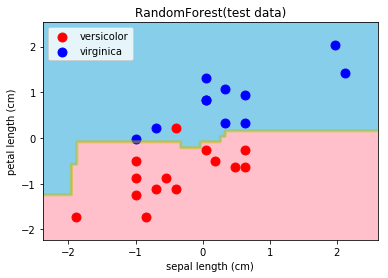

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 5 n_estimatorsが 50
accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f値 : 0.9285714285714286


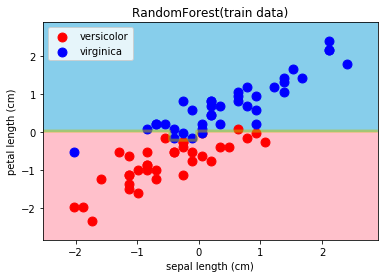

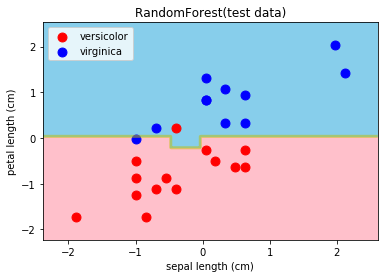

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 5 n_estimatorsが 100
accuracy : 0.96
precision : 1.0
recall : 0.9285714285714286
f値 : 0.962962962962963


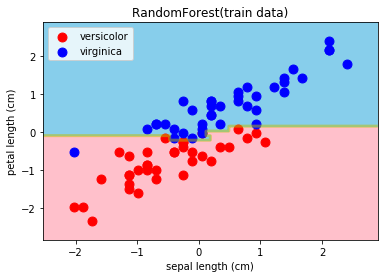

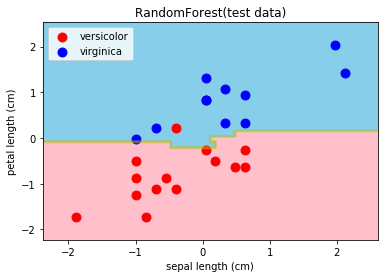

In [74]:
#max_depthとn_estimatorsを変化させて、指標値を確認
n_estimators = [10, 50, 100]
for i in range(1, 6):
    for j in n_estimators:
    
        #学習
        forest_tuning = RandomForestClassifier(max_depth=j, n_estimators=i)
        forest_tuning.fit(X_train_std, y_train)

        #推定
        y_pred_forest_tuning = forest_tuning.predict(X_test_std)
        
                
        print('- ' * 90, '\n')
        print('max_depthが', i, 'n_estimatorsが', j)

        #accuracy
        accuracy_score_forest_tuning = accuracy_score(y_test, y_pred_forest_tuning)
        print('accuracy :', accuracy_score_forest_tuning)

        #precision
        precision_score_forest_tuning = precision_score(y_test, y_pred_forest_tuning)
        print('precision :', precision_score_forest_tuning)

        #recall
        recall_score_forest_tuning = recall_score(y_test, y_pred_forest_tuning)
        print('recall :', recall_score_forest_tuning)

        #f1
        f1_score_forest_tuning = f1_score(y_test, y_pred_forest_tuning)
        print('f値 :', f1_score_forest_tuning)

        #散布図を出力
        decision_region(X_train_std, y_train, forest_tuning, title='RandomForest(train data)')
        decision_region(X_test_std, y_test, forest_tuning, title='RandomForest(test data)')

ランダムフォレストでは、max_depthを1~5の範囲で、n_estimatorsを10, 50, 100と変化させた。   
max_depth=2, n_estimators=10とmax_depth=2, n_estimators=50の組みわせが他の組み合わせより若干悪かった。だが、max_depth=2, n_estimators=100では他と相違ない良好な結果になっていたため、n_estimatorsは大きいほうが良好な結果になることを実感できた。

## 【問題8】 標準化の有無の比較

### ・最近傍法

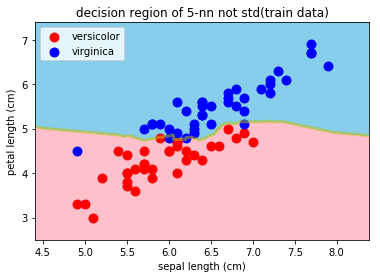

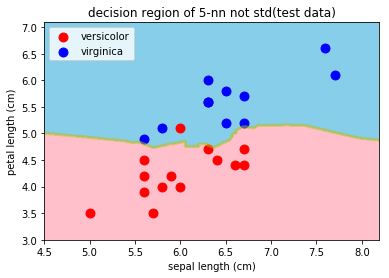

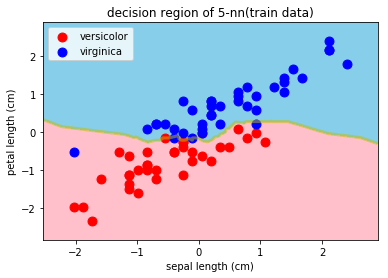

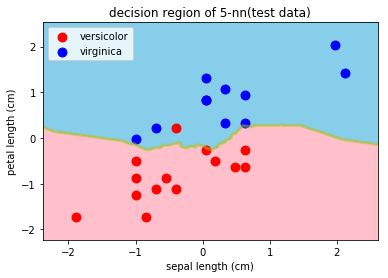

In [51]:
#学習
neigh_5nn_not_std = KNeighborsClassifier()
neigh_5nn_not_std.fit(X_train, y_train)

#推定
y_pred_5nn_not_std = neigh_5nn_not_std.predict(X_test)

#accuracy
accuracy_score_5nn_not_std = accuracy_score(y_test, y_pred_5nn_not_std)
    
#precision
precision_score_5nn_not_std = precision_score(y_test, y_pred_5nn_not_std)
    
#recall
recall_score_5nn_not_std = recall_score(y_test, y_pred_5nn_not_std)
    
#f1
f1_score_5nn_not_std = f1_score(y_test, y_pred_5nn_not_std)

#可視化
#学習用データ
decision_region(X_train, y_train, neigh_5nn_not_std, title='decision region of 5-nn not std(train data)')
#検証用データ
decision_region(X_test, y_test, neigh_5nn_not_std, title='decision region of 5-nn not std(test data)')

#標準化有り
decision_region(X_train_std, y_train, neigh_5nn, title='decision region of 5-nn(train data)')
decision_region(X_test_std, y_test, neigh_5nn, title='decision region of 5-nn(test data)')

### ・ロジスティック回帰

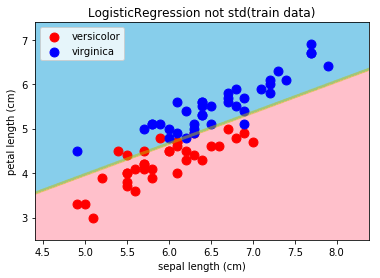

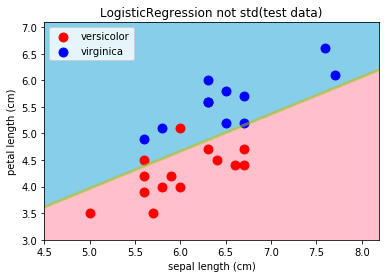

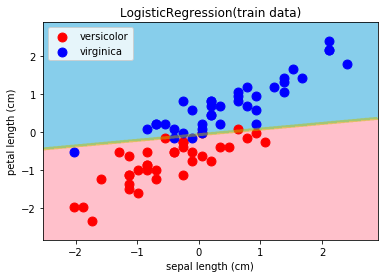

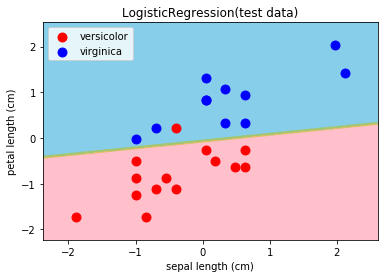

In [52]:
#学習
lr_not_std = LogisticRegression()
lr_not_std.fit(X_train, y_train)

#推定
y_pred_lr_not_std = lr_not_std.predict(X_test)

#accuracy
accuracy_score_lr_not_std = accuracy_score(y_test, y_pred_lr_not_std)
    
#precision
precision_score_lr_not_std = precision_score(y_test, y_pred_lr_not_std)
    
#recall
recall_score_lr_not_std = recall_score(y_test, y_pred_lr_not_std)
    
#f1
f1_score_lr_not_std = f1_score(y_test, y_pred_lr_not_std)

#可視化
#学習用データ
decision_region(X_train, y_train, lr_not_std, title='LogisticRegression not std(train data)')
#検証用データ
decision_region(X_test, y_test, lr_not_std, title='LogisticRegression not std(test data)')

#標準化有り
decision_region(X_train_std, y_train, lr, title='LogisticRegression(train data)')
decision_region(X_test_std, y_test, lr, title='LogisticRegression(test data)')

### ・SVM

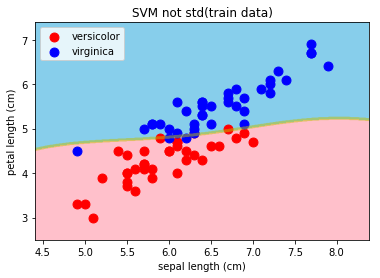

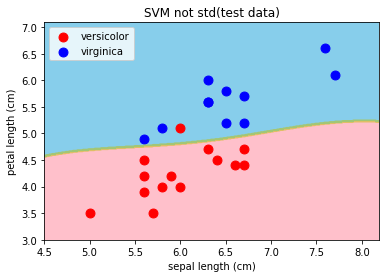

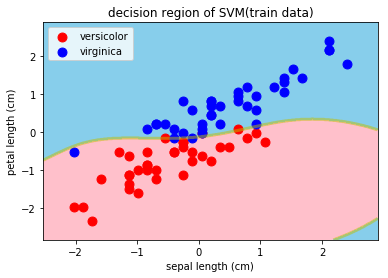

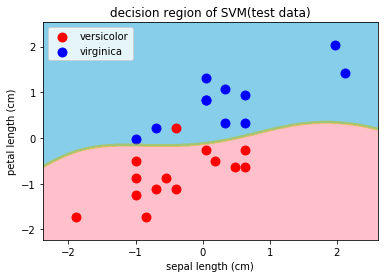

In [53]:
#学習
svm_not_std = SVC()
svm_not_std.fit(X_train, y_train)

#推定
y_pred_svm_not_std = svm_not_std.predict(X_test)

#accuracy
accuracy_score_svm_not_std = accuracy_score(y_test, y_pred_svm_not_std)
    
#precision
precision_score_svm_not_std = precision_score(y_test, y_pred_svm_not_std)
    
#recall
recall_score_svm_not_std = recall_score(y_test, y_pred_svm_not_std)
    
#f1
f1_score_svm_not_std = f1_score(y_test, y_pred_svm_not_std)

#可視化
#学習用データ
decision_region(X_train, y_train, svm_not_std, title='SVM not std(train data)')
#検証用データ
decision_region(X_test, y_test, svm_not_std, title='SVM not std(test data)')

#標準化あり
decision_region(X_train_std, y_train, svm, title='decision region of SVM(train data)')
decision_region(X_test_std, y_test, svm, title='decision region of SVM(test data)')

### ・決定木

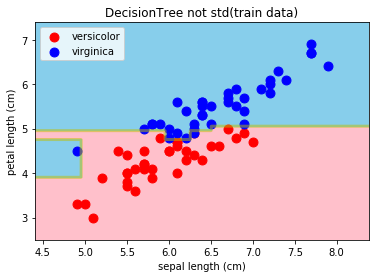

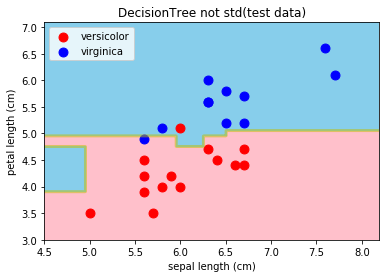

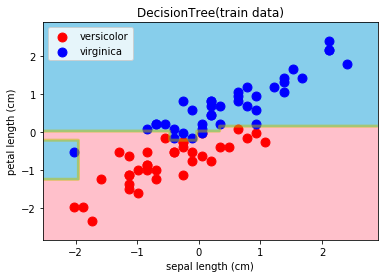

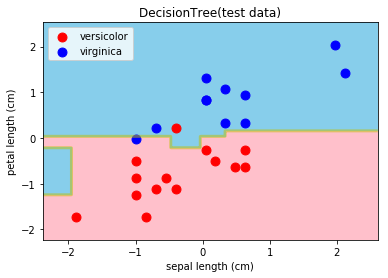

In [54]:
#学習
tree_not_std = DecisionTreeClassifier()
tree_not_std.fit(X_train, y_train)

#推定
y_pred_tree_not_std = tree_not_std.predict(X_test)

#accuracy
accuracy_score_tree_not_std = accuracy_score(y_test, y_pred_tree_not_std)
    
#precision
precision_score_tree_not_std = precision_score(y_test, y_pred_tree_not_std)
    
#recall
recall_score_tree_not_std = recall_score(y_test, y_pred_tree_not_std)
    
#f1
f1_score_tree_not_std = f1_score(y_test, y_pred_tree_not_std)

#可視化
#学習用データ
decision_region(X_train, y_train, tree_not_std, title='DecisionTree not std(train data)')
#検証用データ
decision_region(X_test, y_test, tree_not_std, title='DecisionTree not std(test data)')

#標準化有り
decision_region(X_train_std, y_train, tree, title='DecisionTree(train data)')
decision_region(X_test_std, y_test, tree, title='DecisionTree(test data)')

### ・ランダムフォレスト

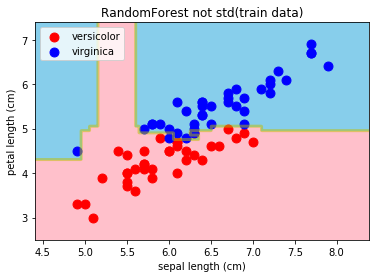

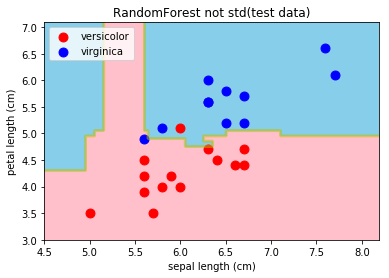

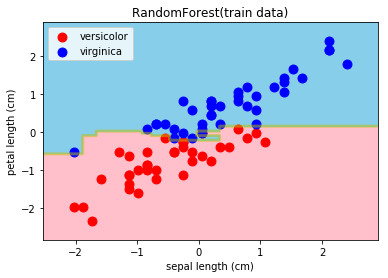

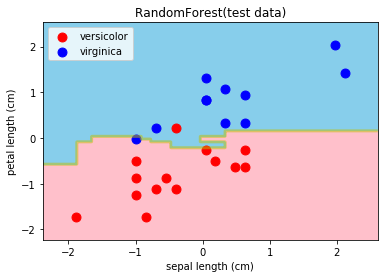

In [55]:
#学習
forest_not_std = RandomForestClassifier()
forest_not_std.fit(X_train, y_train)

#推定
y_pred_forest_not_std = forest_not_std.predict(X_test)

#accuracy
accuracy_score_forest_not_std = accuracy_score(y_test, y_pred_forest_not_std)
    
#precision
precision_score_forest_not_std = precision_score(y_test, y_pred_forest_not_std)
    
#recall
recall_score_forest_not_std = recall_score(y_test, y_pred_forest_not_std)
    
#f1
f1_score_forest_not_std = f1_score(y_test, y_pred_forest_not_std)

#可視化
#学習用データ
decision_region(X_train, y_train, forest_not_std, title='RandomForest not std(train data)')
#検証用データ
decision_region(X_test, y_test, forest_not_std, title='RandomForest not std(test data)')

#標準化有り
decision_region(X_train_std, y_train, forest, title='RandomForest(train data)')
decision_region(X_test_std, y_test, forest, title='RandomForest(test data)')

In [56]:
#標準化なしの場合の指標値の表
score_not_std = pd.DataFrame([[accuracy_score_5nn_not_std, precision_score_5nn_not_std, 
                                    recall_score_5nn_not_std, f1_score_5nn_not_std], 
                                     [accuracy_score_lr_not_std, precision_score_lr_not_std, 
                                      recall_score_lr_not_std, f1_score_lr_not_std],
                                     [accuracy_score_svm_not_std, precision_score_svm_not_std, 
                                      recall_score_svm_not_std, f1_score_svm_not_std],
                                     [accuracy_score_tree_not_std, precision_score_tree_not_std, 
                                      recall_score_tree_not_std, f1_score_tree_not_std],
                                    [accuracy_score_forest_not_std, precision_score_forest_not_std, 
                                     recall_score_forest_not_std, f1_score_forest_not_std]],
                                    index = ['最近傍法', 'ロジスティック回帰', 'SVM', '決定木', 'ランダムフォレスト'], 
                                    columns = ['accuracy', 'precision', 'recall', 'f値'])

score_not_std

,accuracy,precision,recall,f値
最近傍法,0.96,1.000000,0.928571,0.962963
ロジスティック回帰,0.92,1.000000,0.857143,0.923077
SVM,0.96,1.000000,0.928571,0.962963
決定木,0.92,0.928571,0.928571,0.928571
ランダムフォレスト,0.92,0.928571,0.928571,0.928571


In [57]:
#標準化ありの指標値の表
score

,accuracy,precision,recall,f値
最近傍法,0.96,1.000000,0.928571,0.962963
ロジスティック回帰,0.96,1.000000,0.928571,0.962963
SVM,0.96,1.000000,0.928571,0.962963
決定木,0.92,0.928571,0.928571,0.928571
ランダムフォレスト,0.92,0.928571,0.928571,0.928571


今回結果が異なっていたのは、ロジスティック回帰のaccuracy, recall, f値であり、どれも標準化有りの場合と比較して結果が悪くなっていた。決定領域をみると、境界線が全く異なっており、標準化前では検証用データの誤分類が多く見られた。標準化とは、平均が0、標準偏差が1となるようにすることである。これを行うことで、特徴量ごとに尺度を揃えることができる。今回はその尺度が異なっていたため、決定領域の境界線が変わり、結果が悪くなったと思われる。

## 【問題9】 全ての目的変数を使用して精度が高い手法

- マクロ平均   
それぞれの指標値を平均して求められる。例えば、kクラスある場合のprecisionのマクロ平均は、   
$ precision^{}_{macro} = \frac{pre^{}_{1} + pre^{}_{2} + ... + pre^{}_{k} }{k} $   
で表すことができる。   
マクロ平均は、全てのクラスを平等に重み付けする。   


- マイクロ平均   
混合行列全体の真陽性、真陰性、偽陽性、偽陰性を用いて求める。例えば、kクラスある場合のprecisionマイクロ平均は、   
$ precision^{}_{micro} = \frac{TP^{}_{1} + ... + TP^{}_{k} }{TP^{}_{1} + ... + TP^{}_{k} + FP^{}_{1} + ... + FP^{}_{k}} $   
で表すことができる。   
マイクロ平均は、各インスタンスまたは予測を平等に重み付けしたい場合に役立つ。

In [58]:
#irisデータを3種類全て抜き出し
df_3iris = pd.concat([X_df, y_df], axis=1)
df_3iris = df_3iris.iloc[:, [0, 2, 4]]

In [59]:
#説明変数X、目的変数yをndarrayに格納
X_3iris = df_3iris.iloc[:, :-1].values
y_3iris = df_3iris.iloc[:, -1].values

#データを分割
X_train_3iris, X_test_3iris, y_train_3iris, y_test_3iris = train_test_split(X_3iris, y_3iris, test_size=0.25)

#学習用データをfit(平均と標準偏差を計算)し、transform(標準化)
X_train_3iris_std = sc.fit_transform(X_train_3iris)

#検証用データをtransform(標準化)
X_test_3iris_std = sc.transform(X_test_3iris)

In [76]:
def decision_region_3iris(X_train, y_train, model, step=0.01, title='decision region', xlabel='sepal length (cm)', ylabel='petal length (cm)', target_names=['setosa', 'versicolor', 'virginica']):
    """
    3値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples, 2)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['lightgreen', 'pink', 'skyblue']
    n_class = 3

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

### ・最近傍法

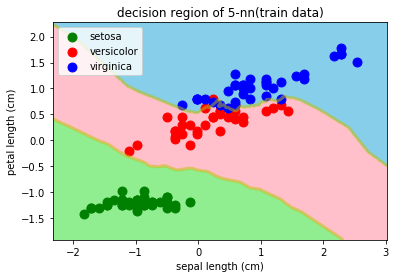

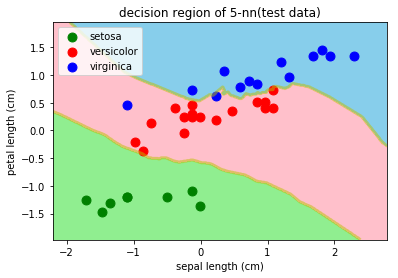

In [61]:
#学習
neigh_3iris = KNeighborsClassifier()
neigh_3iris.fit(X_train_3iris_std, y_train_3iris)

#推定
y_pred_neigh_3iris = neigh_3iris.predict(X_test_3iris_std)

#accuracy
accuracy_score_neigh_3iris = accuracy_score(y_test_3iris, y_pred_neigh_3iris)
    
#precision
#macro平均
precision_score_neigh_3iris_macro = precision_score(y_test_3iris, y_pred_neigh_3iris, average='macro')
#micro平均
precision_score_neigh_3iris_micro = precision_score(y_test_3iris, y_pred_neigh_3iris, average='micro')
    
#recall
#macro平均
recall_score_neigh_3iris_macro = recall_score(y_test_3iris, y_pred_neigh_3iris, average='macro')
#micro平均
recall_score_neigh_3iris_micro = recall_score(y_test_3iris, y_pred_neigh_3iris, average='micro')
    
#f1
#macro平均
f1_score_neigh_3iris_macro = f1_score(y_test_3iris, y_pred_neigh_3iris, average='macro')
#micro平均
f1_score_neigh_3iris_micro = f1_score(y_test_3iris, y_pred_neigh_3iris, average='micro')

#可視化
#学習用データ
decision_region_3iris(X_train_3iris_std, y_train_3iris, neigh_3iris, title='decision region of 5-nn(train data)')
#検証用データ
decision_region_3iris(X_test_3iris_std, y_test_3iris, neigh_3iris, title='decision region of 5-nn(test data)')

### ・ロジスティック回帰

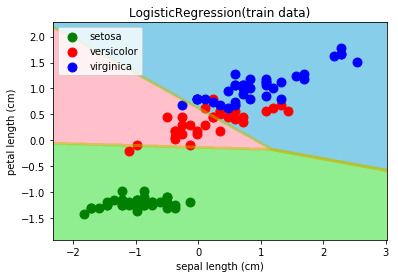

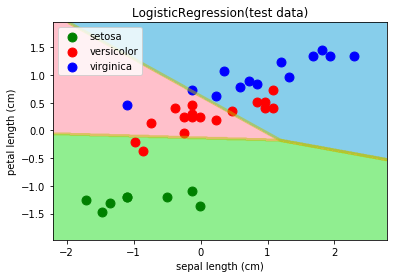

In [62]:
#学習
lr_3iris = LogisticRegression()
lr_3iris.fit(X_train_3iris_std, y_train_3iris)

#推定
y_pred_lr_3iris = lr_3iris.predict(X_test_3iris_std)

#accuracy
accuracy_score_lr_3iris = accuracy_score(y_test_3iris, y_pred_lr_3iris)
    
#precision
#macro平均
precision_score_lr_3iris_macro = precision_score(y_test_3iris, y_pred_lr_3iris, average='macro')
#micro平均
precision_score_lr_3iris_micro = precision_score(y_test_3iris, y_pred_lr_3iris, average='micro')
    
#recall
#macro平均
recall_score_lr_3iris_macro = recall_score(y_test_3iris, y_pred_lr_3iris, average='macro')
#micro平均
recall_score_lr_3iris_micro = recall_score(y_test_3iris, y_pred_lr_3iris, average='micro')
    
#f1
#macro平均
f1_score_lr_3iris_macro = f1_score(y_test_3iris, y_pred_lr_3iris, average='macro')
#micro平均
f1_score_lr_3iris_micro = f1_score(y_test_3iris, y_pred_lr_3iris, average='micro')

#可視化
#学習用データ
decision_region_3iris(X_train_3iris_std, y_train_3iris, lr_3iris, title='LogisticRegression(train data)')
#検証用データ
decision_region_3iris(X_test_3iris_std, y_test_3iris, lr_3iris, title='LogisticRegression(test data)')

### ・SVM

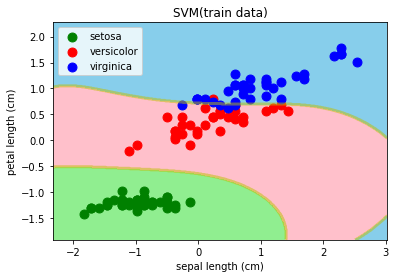

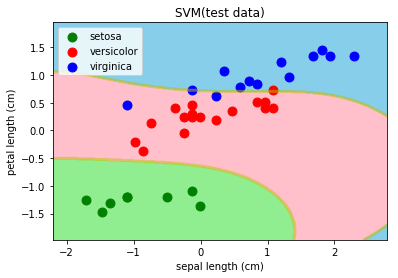

In [63]:
#学習
svm_3iris = SVC()
svm_3iris.fit(X_train_3iris_std, y_train_3iris)

#推定
y_pred_svm_3iris = svm_3iris.predict(X_test_3iris_std)

#accuracy
accuracy_score_svm_3iris = accuracy_score(y_test_3iris, y_pred_svm_3iris)
    
#precision
#macro平均
precision_score_svm_3iris_macro = precision_score(y_test_3iris, y_pred_svm_3iris, average='macro')
#micro平均
precision_score_svm_3iris_micro = precision_score(y_test_3iris, y_pred_svm_3iris, average='micro')
    
#recall
#macro平均
recall_score_svm_3iris_macro = recall_score(y_test_3iris, y_pred_svm_3iris, average='macro')
#micro平均
recall_score_svm_3iris_micro = recall_score(y_test_3iris, y_pred_svm_3iris, average='micro')
    
#f1
#macro平均
f1_score_svm_3iris_macro = f1_score(y_test_3iris, y_pred_svm_3iris, average='macro')
#micro平均
f1_score_svm_3iris_micro = f1_score(y_test_3iris, y_pred_svm_3iris, average='micro')

#可視化
#学習用データ
decision_region_3iris(X_train_3iris_std, y_train_3iris, svm_3iris, title='SVM(train data)')
#検証用データ
decision_region_3iris(X_test_3iris_std, y_test_3iris, svm_3iris, title='SVM(test data)')

### ・決定木

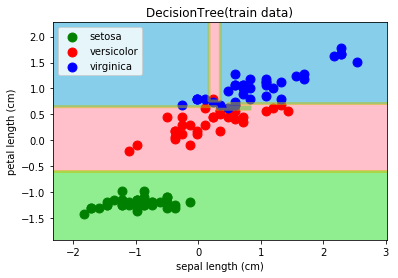

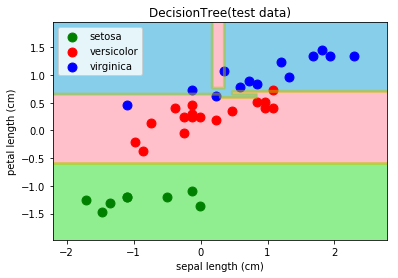

In [64]:
#学習
tree_3iris = DecisionTreeClassifier()
tree_3iris.fit(X_train_3iris_std, y_train_3iris)

#推定
y_pred_tree_3iris = tree_3iris.predict(X_test_3iris_std)

#accuracy
accuracy_score_tree_3iris = accuracy_score(y_test_3iris, y_pred_tree_3iris)
    
#precision
#macro平均
precision_score_tree_3iris_macro = precision_score(y_test_3iris, y_pred_tree_3iris, average='macro')
#micro平均
precision_score_tree_3iris_micro = precision_score(y_test_3iris, y_pred_tree_3iris, average='micro')
    
#recall
#macro平均
recall_score_tree_3iris_macro = recall_score(y_test_3iris, y_pred_tree_3iris, average='macro')
#micro平均
recall_score_tree_3iris_micro = recall_score(y_test_3iris, y_pred_tree_3iris, average='micro')
    
#f1
#macro平均
f1_score_tree_3iris_macro = f1_score(y_test_3iris, y_pred_tree_3iris, average='macro')
#micro平均
f1_score_tree_3iris_micro = f1_score(y_test_3iris, y_pred_tree_3iris, average='micro')

#可視化
#学習用データ
decision_region_3iris(X_train_3iris_std, y_train_3iris, tree_3iris, title='DecisionTree(train data)')
#検証用データ
decision_region_3iris(X_test_3iris_std, y_test_3iris, tree_3iris, title='DecisionTree(test data)')

### ・ランダムフォレスト

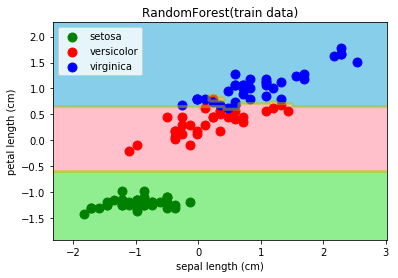

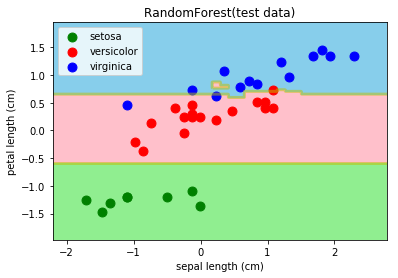

In [65]:
#学習
forest_3iris = RandomForestClassifier()
forest_3iris.fit(X_train_3iris_std, y_train_3iris)
               
#推定
y_pred_forest_3iris = forest_3iris.predict(X_test_3iris_std)

#accuracy
accuracy_score_forest_3iris = accuracy_score(y_test_3iris, y_pred_forest_3iris)
    
#precision
#macro平均
precision_score_forest_3iris_macro = precision_score(y_test_3iris, y_pred_forest_3iris, average='macro')
#micro平均
precision_score_forest_3iris_micro = precision_score(y_test_3iris, y_pred_forest_3iris, average='micro')
    
#recall
#macro平均
recall_score_forest_3iris_macro = recall_score(y_test_3iris, y_pred_forest_3iris, average='macro')
#micro平均
recall_score_forest_3iris_micro = recall_score(y_test_3iris, y_pred_forest_3iris, average='micro')
    
#f1
#macro平均
f1_score_forest_3iris_macro = f1_score(y_test_3iris, y_pred_forest_3iris, average='macro')
#micro平均
f1_score_forest_3iris_micro = f1_score(y_test_3iris, y_pred_forest_3iris, average='micro')

#可視化
#学習用データ
decision_region_3iris(X_train_3iris_std, y_train_3iris, forest_3iris, title='RandomForest(train data)')
#検証用データ
decision_region_3iris(X_test_3iris_std, y_test_3iris, forest_3iris, title='RandomForest(test data)')

In [66]:
#指標値の表(macro平均)
score_3iris_macro = pd.DataFrame([[accuracy_score_neigh_3iris, precision_score_neigh_3iris_macro, 
                                    recall_score_neigh_3iris_macro, f1_score_neigh_3iris_macro], 
                                     [accuracy_score_lr_3iris, precision_score_lr_3iris_macro, 
                                      recall_score_lr_3iris_macro, f1_score_lr_3iris_macro],
                                     [accuracy_score_svm_3iris, precision_score_svm_3iris_macro, 
                                      recall_score_svm_3iris_macro, f1_score_svm_3iris_macro],
                                     [accuracy_score_tree_3iris, precision_score_tree_3iris_macro, 
                                      recall_score_tree_3iris_macro, f1_score_tree_3iris_macro],
                                    [accuracy_score_forest_3iris, precision_score_forest_3iris_macro, 
                                     recall_score_forest_3iris_macro, f1_score_forest_3iris_macro]],
                                    index = ['最近傍法', 'ロジスティック回帰', 'SVM', '決定木', 'ランダムフォレスト'], 
                                    columns = ['accuracy', 'precision', 'recall', 'f値'])

score_3iris_macro

,accuracy,precision,recall,f値
最近傍法,0.947368,0.964912,0.948718,0.953704
ロジスティック回帰,0.763158,0.788889,0.817496,0.776583
SVM,0.921053,0.935185,0.929110,0.931429
決定木,0.894737,0.917065,0.903469,0.907407
ランダムフォレスト,0.921053,0.935185,0.929110,0.931429


In [67]:
#指標値の表(micro平均)
score_3iris_micro = pd.DataFrame([[accuracy_score_neigh_3iris, precision_score_neigh_3iris_micro, 
                                    recall_score_neigh_3iris_micro, f1_score_neigh_3iris_micro], 
                                     [accuracy_score_lr_3iris, precision_score_lr_3iris_micro, 
                                      recall_score_lr_3iris_micro, f1_score_lr_3iris_micro],
                                     [accuracy_score_svm_3iris, precision_score_svm_3iris_micro, 
                                      recall_score_svm_3iris_micro, f1_score_svm_3iris_micro],
                                     [accuracy_score_tree_3iris, precision_score_tree_3iris_micro, 
                                      recall_score_tree_3iris_micro, f1_score_tree_3iris_micro],
                                    [accuracy_score_forest_3iris, precision_score_forest_3iris_micro, 
                                     recall_score_forest_3iris_micro, f1_score_forest_3iris_micro]],
                                    index = ['最近傍法', 'ロジスティック回帰', 'SVM', '決定木', 'ランダムフォレスト'], 
                                    columns = ['accuracy', 'precision', 'recall', 'f値'])

score_3iris_micro

,accuracy,precision,recall,f値
最近傍法,0.947368,0.947368,0.947368,0.947368
ロジスティック回帰,0.763158,0.763158,0.763158,0.763158
SVM,0.921053,0.921053,0.921053,0.921053
決定木,0.894737,0.894737,0.894737,0.894737
ランダムフォレスト,0.921053,0.921053,0.921053,0.921053


今回、全ての指標値において最近傍法が最も良い結果であった。決定領域を見ると、vesicolorとvirginicaの一部分は重なっていたが、最近傍法の境界線は入り組んでおり、上手く分類できていた。逆に、ロジスティック回帰は一番結果が悪く、決定領域の境界線が直線であったため、分類できていない部分が多かった。また、全体的にマイクロ平均よりもマクロ平均のほうが若干良好な結果になっていたが、今回は特に大きな影響はないように感じた。